In [36]:
import pandas as pd

import dash
from dash import dcc, html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc

import plotly_express as px
import seaborn as sns
from matplotlib import pyplot as plt

import analyze_functions as af

# Import data
athlete_regions = pd.read_csv("data/athlete_regions.csv")
athlete_iso = pd.read_csv("data/athlete_iso.csv").iloc[:, 1:]
noc_iso = pd.read_csv("data/noc_iso.csv").iloc[:, 1:]

In [40]:
sport = 'Ice Hockey'
chosen_region = 'Sweden'
df_sport = athlete_regions[athlete_regions["region"] ==chosen_region] 
df_sport = df_sport[df_sport["Sport"] == sport]
print(df_sport.shape)
df_sport.head()


(486, 18)


ID                                Name Sex   Age  Height  Weight  \
928    526  Kurt Christer Abrahamsson (-Abris)   M  24.0   187.0    77.0   
935    529     Karl Gustaf Emanuel Abrahamsson   M  31.0     NaN     NaN   
936    530              Ulf Thommy Abrahamsson   M  24.0   185.0    81.0   
2390  1336                  Mats Bertil hlberg   M  24.0   179.0    78.0   
2391  1336                  Mats Bertil hlberg   M  32.0   179.0    78.0   

        Team  NOC        Games  Year  Season          City       Sport  \
928   Sweden  SWE  1972 Winter  1972  Winter       Sapporo  Ice Hockey   
935   Sweden  SWE  1928 Winter  1928  Winter  Sankt Moritz  Ice Hockey   
936   Sweden  SWE  1972 Winter  1972  Winter       Sapporo  Ice Hockey   
2390  Sweden  SWE  1972 Winter  1972  Winter       Sapporo  Ice Hockey   
2391  Sweden  SWE  1980 Winter  1980  Winter   Lake Placid  Ice Hockey   

                            Event   Medal  region notes _merge  
928   Ice Hockey Men's Ice Hockey     NaN  Sweden   NaN   both  
935   Ice Hockey Men's Ice Hockey  Silver  Sweden   NaN   both  
936   Ice Hockey Men's Ice Hockey     NaN  Sweden   NaN   both  
2390  Ice Hockey Men's Ice Hockey     NaN  Sweden   NaN   both  
2391  Ice Hockey Men's Ice Hockey  Bronze  Sweden   NaN   both

In [46]:
medal = "Total"
athlete_attribute = "Age"
df_athlete = df_sport[(df_sport["Medal"]=="Gold") | (df_sport["Medal"]=="Silver") | (df_sport["Medal"]=="Bronze")] 
df_athlete = df_athlete[df_athlete[athlete_attribute].notna()]
df_athlete.head()

ID                             Name Sex   Age  Height  Weight    Team  \
935    529  Karl Gustaf Emanuel Abrahamsson   M  31.0     NaN     NaN  Sweden   
2391  1336               Mats Bertil hlberg   M  32.0   179.0    78.0  Sweden   
2396  1340               Annica Gunilla hln   F  27.0   177.0    75.0  Sweden   
2398  1342                Thomas Valter hln   M  24.0   182.0    90.0  Sweden   
4630  2639           Hans Daniel Alfredsson   M  33.0   182.0    92.0  Sweden   

      NOC        Games  Year  Season            City       Sport  \
935   SWE  1928 Winter  1928  Winter    Sankt Moritz  Ice Hockey   
2391  SWE  1980 Winter  1980  Winter     Lake Placid  Ice Hockey   
2396  SWE  2002 Winter  2002  Winter  Salt Lake City  Ice Hockey   
2398  SWE  1984 Winter  1984  Winter        Sarajevo  Ice Hockey   
4630  SWE  2006 Winter  2006  Winter          Torino  Ice Hockey   

                              Event   Medal  region notes _merge  
935     Ice Hockey Men's Ice Hockey  Silver  Sweden   NaN   both  
2391    Ice Hockey Men's Ice Hockey  Bronze  Sweden   NaN   both  
2396  Ice Hockey Women's Ice Hockey  Bronze  Sweden   NaN   both  
2398    Ice Hockey Men's Ice Hockey  Bronze  Sweden   NaN   both  
4630    Ice Hockey Men's Ice Hockey    Gold  Sweden   NaN   both

Text(0.5, 1.0, 'Age of Total medals')

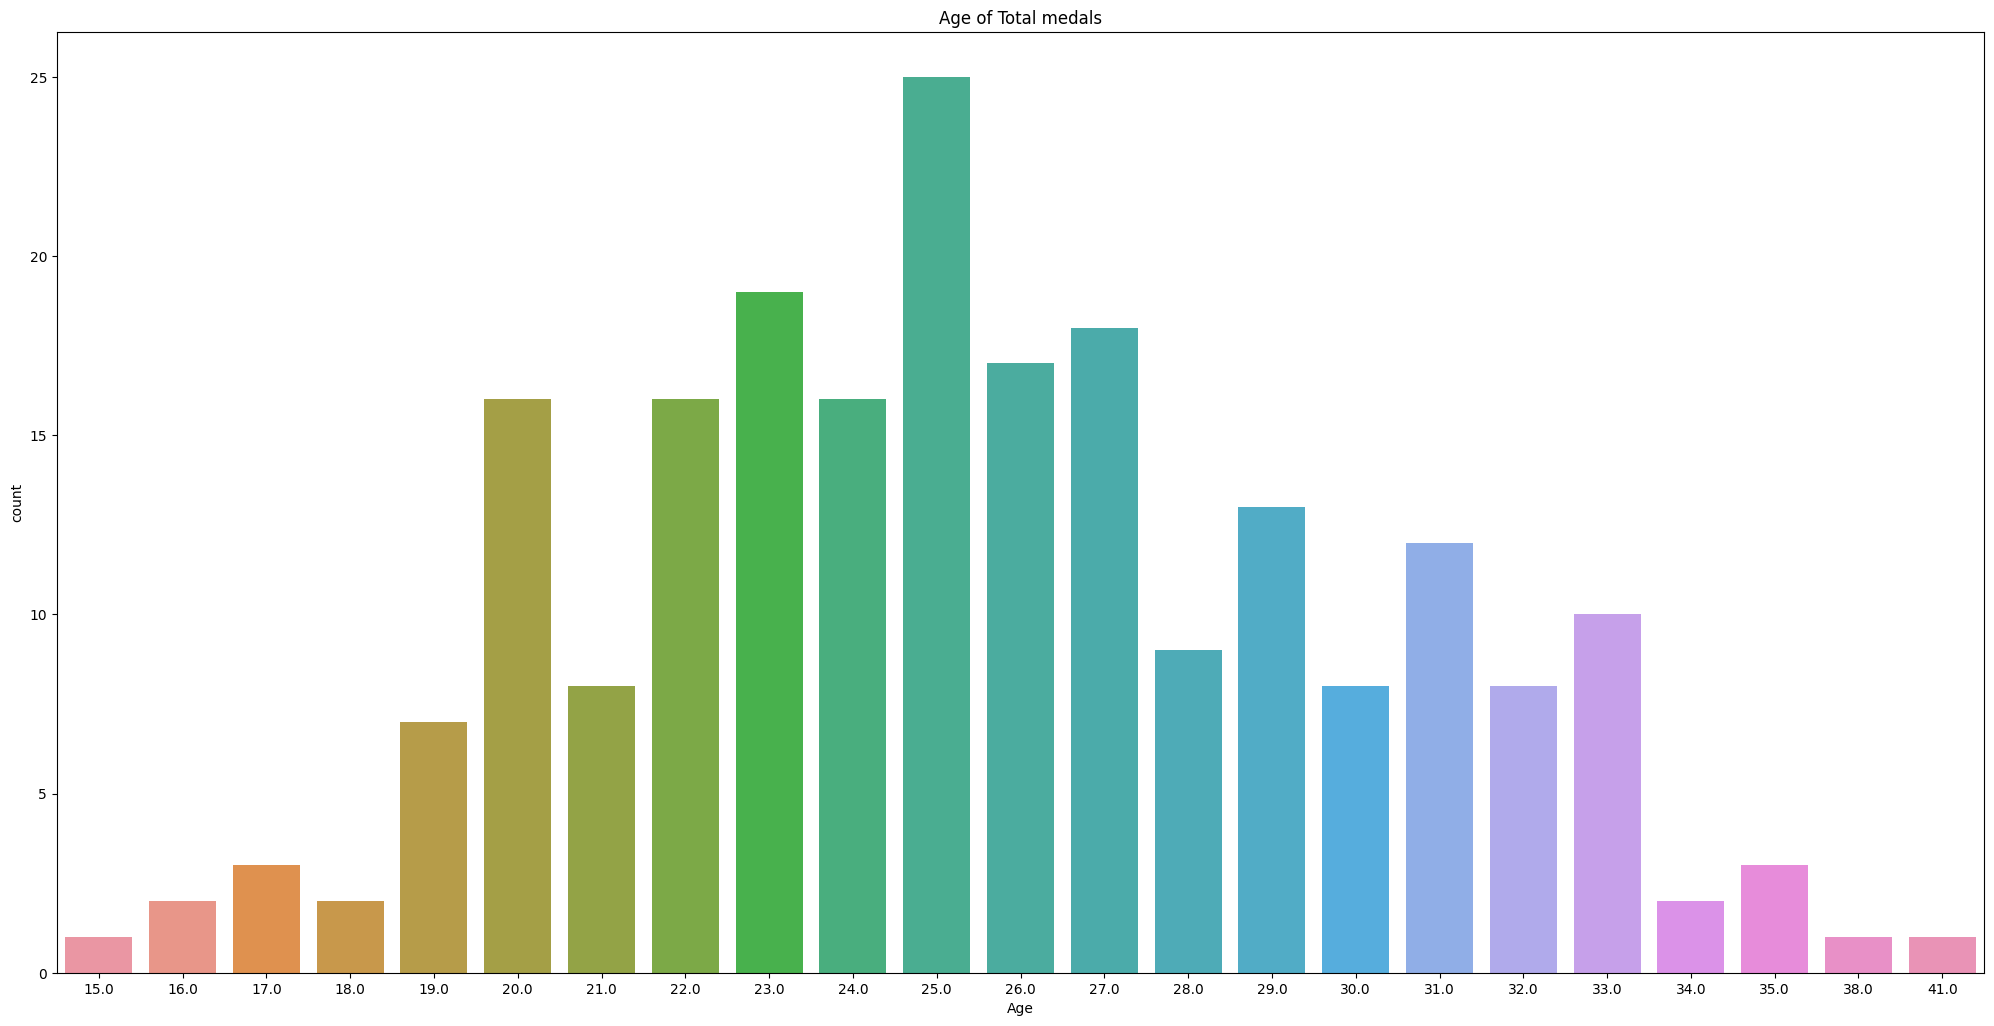

In [48]:
fig, ax = plt.subplots(dpi=100, figsize=(20,10))
plt.tight_layout()
fig = sns.countplot(x=df_athlete[athlete_attribute])
fig.set_title(f"{athlete_attribute} of {medal} medals")

In [8]:
chosen_region = "All regions"
athlete_gender = "Both"
athlete_attribute = "Weight"
unit_dict = {
    'Sex':'Gender',
    'Age':'Age (years)',
    'Height':'Height (centimetres)',
    'Weight':'Weight (kilograms)'
}

In [9]:
if chosen_region == "All regions":
    athlete_region = athlete_regions.copy()
else:
    athlete_region = athlete_regions[athlete_regions['region']==chosen_region]

# Update figure (according to chosen gender)
if athlete_gender == "Both":
    fig = px.histogram(athlete_region, x=athlete_attribute)
else:
    fig = px.histogram(athlete_region[athlete_region["Sex"]==athlete_gender], x=athlete_attribute)
    
    # Update axis texts
fig.layout.yaxis.title.text = "Number of athletes"
fig.layout.xaxis.title.text = unit_dict[athlete_attribute]
fig.show()

In [13]:
df = af.count_medals_n(athlete_iso, "Country", "ISO", "Year")
df.head()

Medal      Country  ISO  Year  Bronze  Gold  Silver  Total
0      Afghanistan  AFG  2008       1     0       0      1
1      Afghanistan  AFG  2012       1     0       0      1
2          Algeria  DZA  1984       2     0       0      2
3          Algeria  DZA  1992       1     1       0      2
4          Algeria  DZA  1996       1     2       0      3

In [18]:
dff= df.groupby(["Country", "ISO"]).sum().reset_index()
dff = dff.loc[:, ["Country", "ISO", "Gold", "Silver", "Bronze", "Total"]]
dff.head()

Medal      Country  ISO  Gold  Silver  Bronze  Total
0      Afghanistan  AFG     0       0       2      2
1          Algeria  DZA     5       4       8     17
2        Argentina  ARG    91      92      91    274
3          Armenia  ARM     2       5       9     16
4        Australia  AUS   348     455     517   1320

In [25]:
df = af.count_medals(athlete_regions, "NOC", "Year").reset_index()
df.head()

Medal  NOC  Year  Bronze  Gold  Silver  Total
0      URS  1980     133   205     158    496
1      USA  1904     125   128     141    394
2      GBR  1908      90   147     131    368
3      URS  1988     111   174      81    366
4      USA  1984      50   190     121    361

In [27]:
fig = px.choropleth(df, locations="NOC",
                        color="Total",
                        scope=None,
                        hover_name="Total",
                        animation_frame="Year",
                        #title = f"Geographic map: {chosen_sport} {medal} medals", 
                        range_color=[0,df["Total"].quantile(0.9)],
                        color_continuous_scale=px.colors.sequential.Plasma)
      
fig["layout"].pop("updatemenus")
fig.show()

In [5]:
athlete_regions[athlete_regions["NOC"] == "EUN"]

ID                                  Name Sex   Age  Height  \
620        359        Andrey Khakimovich Abduvaliyev   M  26.0   190.0   
1972      1090                Inha Mykolavna Afonina   F  22.0     NaN   
3067      1713            Artur Vladimirovich Akoyev   M  26.0     NaN   
4839      2764        Magomedbek Daitbekovich Aliyev   M  25.0     NaN   
4880      2786           Yuliya Yakunovna Allagulova   F  19.0   176.0   
...        ...                                   ...  ..   ...     ...   
270641  135355             Sergey Mikhaylovich Zubov   M  21.0   186.0   
270944  135490                  Irina Lvovna Zuykova   F  34.0     NaN   
270945  135490                  Irina Lvovna Zuykova   F  34.0     NaN   
270975  135502  Nataliya Maratovna "Natasha" Zvereva   F  21.0   172.0   
270976  135502  Nataliya Maratovna "Natasha" Zvereva   F  21.0   172.0   

        Weight          Team  NOC        Games  Year  Season         City  \
620      125.0  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
1972       NaN  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
3067     109.0  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
4839       NaN  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
4880      54.0  Unified Team  EUN  1992 Winter  1992  Winter  Albertville   
...        ...           ...  ...          ...   ...     ...          ...   
270641    91.0  Unified Team  EUN  1992 Winter  1992  Winter  Albertville   
270944     NaN  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
270945     NaN  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
270975    60.0  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   
270976    60.0  Unified Team  EUN  1992 Summer  1992  Summer    Barcelona   

                            Sport  \
620                     Athletics   
1972                       Diving   
3067                Weightlifting   
4839                         Judo   
4880    Short Track Speed Skating   
...                           ...   
270641                 Ice Hockey   
270944              Equestrianism   
270945              Equestrianism   
270975                     Tennis   
270976                     Tennis   

                                                    Event   Medal  region  \
620                          Athletics Men's Hammer Throw    Gold  Russia   
1972                              Diving Women's Platform     NaN  Russia   
3067                   Weightlifting Men's Heavyweight II  Silver  Russia   
4839                               Judo Men's Lightweight     NaN  Russia   
4880    Short Track Speed Skating Women's 3,000 metres...  Bronze  Russia   
...                                                   ...     ...     ...   
270641                        Ice Hockey Men's Ice Hockey    Gold  Russia   
270944           Equestrianism Mixed Dressage, Individual     NaN  Russia   
270945                 Equestrianism Mixed Dressage, Team     NaN  Russia   
270975                             Tennis Women's Singles     NaN  Russia   
270976                             Tennis Women's Doubles  Bronze  Russia   

       notes _merge  
620      NaN   both  
1972     NaN   both  
3067     NaN   both  
4839     NaN   both  
4880     NaN   both  
...      ...    ...  
270641   NaN   both  
270944   NaN   both  
270945   NaN   both  
270975   NaN   both  
270976   NaN   both  

[864 rows x 18 columns]

In [6]:
noc_iso

Country  NOC  ISO
0       Afghanistan  AFG  AFG
1           Albania  ALB  ALB
2           Algeria  ALG  DZA
3    American Samoa  ASA  ASM
4           Andorra  AND  AND
..              ...  ...  ...
202           Yemen  YEM  YEM
203          Zambia  ZAM  ZMB
204        Zimbabwe  ZIM  ZWE
205          Russia  URS  RUS
206          Russia  EUN  RUS

[207 rows x 3 columns]

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from datetime import datetime
from load_data import ShowMeData
import analyze_functions as af

In [8]:
athlete_regions = pd.read_csv("data/athlete_regions.csv")
noc_iso = pd.read_csv("data/noc_iso.csv")
noc_iso = noc_iso.iloc[:, 1:]
sport ="Tennis"

In [9]:
# Dropdown options
# Sport dropdown
sport_list = athlete_regions['Sport'].unique().tolist()
sport_list.append("All Sports")
sport_list.sort()
sport_options_dropdown = [
    {'label':sport, 'value': sport} 
    for sport in sport_list
]

In [10]:
# Data for all sports
df = af.count_medals(athlete_regions, "NOC", "Year")
df = df.reset_index()
df_iso = df.merge(noc_iso, on="NOC", how="left")
df_iso = df_iso.sort_values(by=["Year", "NOC"])

In [11]:
df.head()

Medal  NOC  Year  Bronze  Gold  Silver  Total
0      URS  1980     133   205     158    496
1      USA  1904     125   128     141    394
2      GBR  1908      90   147     131    368
3      URS  1988     111   174      81    366
4      USA  1984      50   190     121    361

    # Data for all sports
    if sport=="All Sports":
        dff = df_iso

In [12]:
df_iso.head()

NOC  Year  Bronze  Gold  Silver  Total         Country  ISO
1059  AUS  1896       1     2       0      3       Australia  AUS
869   AUT  1896       2     2       1      5         Austria  AUT
852   DEN  1896       3     1       2      6         Denmark  DNK
696   FRA  1896       2     5       4     11          France  FRA
751   GBR  1896       3     3       3      9  United Kingdom  GBR

In [13]:
df_sport = athlete_regions[athlete_regions['Sport']=="Tennis"]
df_sport = af.count_medals(df_sport, "NOC", "Year")
df_sport = df_sport.reset_index()
dff = df_sport.merge(noc_iso, on="NOC", how="left")
dff = dff.sort_values(by=["Year", "NOC"])
dff.head()


NOC  Year  Bronze  Gold  Silver  Total         Country  ISO
83  AUS  1896       1     0       0      1       Australia  AUS
33  GBR  1896       1     2       0      3  United Kingdom  GBR
95  GER  1896       0     1       0      1         Germany  DEU
19  GRE  1896       1     0       3      4          Greece  GRC
90  HUN  1896       1     0       0      1         Hungary  HUN

In [14]:
medal = "Total"
dff_sort = dff.sort_values(medal, ascending=False)
dff_sort = dff_sort.head(10)
dff_sort

NOC  Year  Bronze  Gold  Silver  Total         Country  ISO
0  GBR  1908       5     8       7     20  United Kingdom  GBR
1  GBR  1900       6     6       2     14  United Kingdom  GBR
2  USA  1904       6     3       3     12   United States  USA
4  USA  1924       0     8       2     10   United States  USA
3  GBR  1920       1     4       5     10  United Kingdom  GBR
5  GRE  1906       3     1       5      9          Greece  GRC
6  GBR  1912       3     3       3      9  United Kingdom  GBR
7  FRA  1912       4     4       0      8          France  FRA
8  USA  2012       2     5       0      7   United States  USA
9  USA  1988       2     4       1      7   United States  USA

In [15]:
fig2 = px.bar(dff_sort, x=dff_sort["Country"], y=medal, color="Year",
    title="Hightlights in chosen_sport: top 10 {medal} medals",
    labels={"value":"Number of medals", "variable":"Country"}
    )
fig2.update_layout(barmode='group', xaxis_tickangle=45)
fig2.show()

In [16]:
dff1 = df_iso.sort_values("Total", ascending=False)
dff1 = dff1.head(10)
dff1.head

<bound method NDFrame.head of    NOC  Year  Bronze  Gold  Silver  Total         Country  ISO
0  URS  1980     133   205     158    496          Russia  RUS
1  USA  1904     125   128     141    394   United States  USA
2  GBR  1908      90   147     131    368  United Kingdom  GBR
3  URS  1988     111   174      81    366          Russia  RUS
4  USA  1984      50   190     121    361   United States  USA
5  URS  1976      88   152     102    342          Russia  RUS
6  USA  2008      80   127     110    317   United States  USA
7  GDR  1980      73   131      99    303             NaN  NaN
8  EUN  1992      81   127      71    279          Russia  RUS
9  USA  2016      71   139      54    264   United States  USA>

In [17]:
fig = px.bar(dff1, x="Country", y="Total", color="Year",
    title="Hightlights in chosen_sport: top 10 {medal} medals",
    labels={"value":"Number of medals", "variable":"Country"}
    )
fig.update_layout(barmode='group', xaxis_tickangle=45)
fig.show()

In [18]:
athlete_regions.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes _merge  
0       Basketball Men's Basketball   NaN        China   NaN   both  
1      Judo Men's Extra-Lightweight   NaN        China   NaN   both  
2           Football Men's Football   NaN      Denmark   NaN   both  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   both  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN   both

In [19]:
noc_iso.head()

Country  NOC  ISO
0     Afghanistan  AFG  AFG
1         Albania  ALB  ALB
2         Algeria  ALG  DZA
3  American Samoa  ASA  ASM
4         Andorra  AND  AND

In [20]:
df_sport = athlete_regions[athlete_regions['Sport']==sport]
df_sport = af2.count_medals(df_sport, "NOC", "Year")
df_sport = df_sport.reset_index()
df_sport_iso = df_sport.merge(noc_iso, on="NOC", how="left")
df_sport_iso = df_sport_iso.sort_values(by=["Year", "NOC"])
df_sport_iso.head()

NameError: name 'af2' is not defined

In [ ]:
athlete_regions = athlete_regions[athlete_regions['region'].notna()]
region_list = athlete_regions['region'].unique().tolist()
region_list.sort()
region_list



['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [ ]:
athlete_region = athlete_regions[athlete_regions['region']=="Canada"]
df_top = af2.count_medals(athlete_region, "Year")
df_top = df_top.head(10)
df_top.head()

Medal  Bronze  Gold  Silver  Total
Year                              
1984       33    21      37     91
2010        8    67      15     90
2014        5    59      22     86
1992       15    32      33     80
2002       15    52       7     74

In [ ]:
fig = px.bar(
    df_top, x=df_top.index, y=medal_list,
    title=f"{chosen_region}: top {attr_dict[chosen_attribute]}",
    labels={"value":"Number medals", "variable":"Medal"}
)
fig.update_layout(barmode='group', xaxis_tickangle=45)

NameError: name 'chosen_region' is not defined

In [ ]:
df_sport_iso.to_json()

'{"NOC":{"83":"AUS","33":"GBR","95":"GER","19":"GRE","90":"HUN","72":"BOH","17":"FRA","1":"GBR","40":"USA","2":"USA","39":"BOH","12":"FRA","5":"GRE","0":"GBR","93":"GER","31":"SWE","104":"ANZ","70":"AUT","81":"DEN","7":"FRA","6":"GBR","27":"GER","96":"NOR","24":"RSA","14":"SWE","10":"FRA","3":"GBR","30":"JPN","53":"RSA","55":"TCH","11":"FRA","18":"GBR","92":"ITA","48":"NED","4":"USA","99":"ARG","57":"AUS","82":"BUL","69":"ESP","34":"FRG","44":"SWE","16":"TCH","9":"USA","47":"ARG","46":"AUS","41":"CRO","23":"ESP","45":"EUN","35":"GER","52":"RSA","87":"SUI","20":"USA","64":"AUS","42":"CZE","22":"ESP","63":"GBR","77":"GER","91":"IND","26":"USA","71":"AUS","65":"BEL","61":"CAN","68":"ESP","102":"FRA","97":"GER","49":"NED","54":"RUS","28":"USA","50":"ARG","100":"AUS","80":"BEL","25":"CHI","76":"CHN","74":"CRO","67":"ESP","101":"FRA","62":"GER","84":"USA","85":"CHI","75":"CHN","43":"ESP","32":"RUS","103":"SRB","59":"SUI","56":"SWE","29":"USA","78":"ARG","38":"BLR","73":"CZE","21":"FRA","37":